
#### Mount the notebook to your Google Drive folder.

In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


#### Opening a .csv datafile and load the data

In [2]:
import pandas as pd
QA = pd.read_csv('/drive/My Drive/Teaching/2025 Spring/INFO 617/Lecture 4 Feb 10/INFO 617 Mental Health QA_LIWC.csv', encoding='latin-1')
print(QA.head(5))

         QID                                   Question_English  \
0  100788023  Watching the elderly matchmaking program was v...   
1  100788009  Falling in love with someone else and breaking...   
2  100788013  I have been suffering from insomnia for half a...   
3  100788013  I have been suffering from insomnia for half a...   
4  100788013  I have been suffering from insomnia for half a...   

                                      Answer_English  Usefulness_vote  \
0  Hello. Let's start by talking about young peop...                2   
1  Hello! Sending you a virtual hug first. Thumbs...                2   
2  Hello! â I saw the issue you raised about in...                8   
3  Hello! â I saw the issue you raised about in...                8   
4  Hi, I just want to hug you. I can feel the kin...                6   

   Comment_count  Received_Bonus_Yes_No  Segment   WC  Analytic  Clout  ...  \
0              0                      0        1  359     52.91  83.28  ...   


### 1. Exploratory Data Analysis
#### 1.1 Understanding Data Structure

In [3]:
QA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86397 entries, 0 to 86396
Columns: 125 entries, QID to Emoji
dtypes: float64(117), int64(6), object(2)
memory usage: 82.4+ MB


#### 1.2 Calculate Descriptive Statistics

In [4]:
QA.describe()

,QID,Usefulness_vote,Comment_count,Received_Bonus_Yes_No,Segment,WC,Analytic,Clout,Authentic,Tone,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
count,8.639700e+04,86397.000000,86397.000000,86397.000000,86397.0,86397.000000,86397.000000,86359.000000,86385.000000,86055.000000,...,86397.000000,86397.000000,86397.000000,86397.000000,86397.000000,86397.000000,86397.000000,86397.000000,86397.000000,86397.000000
mean,1.008195e+08,3.696066,0.188108,0.226779,1.0,361.485677,35.420297,86.609288,37.184117,54.919290,...,0.002742,0.000435,16.942721,5.668207,6.972443,0.473949,0.280939,1.671973,1.875118,0.246987
std,1.494921e+04,2.642346,0.800155,0.431439,0.0,212.424732,20.612153,20.235013,24.168196,31.029913,...,0.057104,0.018663,3.244678,1.499754,1.862775,0.845861,0.518138,1.325822,1.924474,1.114994
min,1.007880e+08,0.000000,0.000000,0.000000,1.0,5.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,3.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.008065e+08,2.000000,0.000000,0.000000,1.0,215.000000,19.120000,84.020000,17.610000,28.140000,...,0.000000,0.000000,14.810000,4.750000,5.800000,0.000000,0.000000,0.750000,0.560000,0.000000
50%,1.008258e+08,3.000000,0.000000,0.000000,1.0,317.000000,32.440000,95.800000,33.740000,57.270000,...,0.000000,0.000000,16.600000,5.530000,6.910000,0.000000,0.000000,1.430000,1.380000,0.000000
75%,1.008321e+08,5.000000,0.000000,0.000000,1.0,469.000000,49.260000,99.000000,53.500000,83.330000,...,0.000000,0.000000,18.640000,6.430000,8.080000,0.640000,0.390000,2.300000,2.620000,0.000000
max,1.008396e+08,31.000000,35.000000,4.000000,1.0,3490.000000,99.000000,99.000000,99.000000,99.000000,...,5.880000,2.880000,68.420000,40.630000,26.670000,20.000000,31.030000,26.320000,38.100000,160.000000


### 2. Remove Unnecessary Features and Data
What features are unnecessary for prediction?

In [5]:
# Some features have zero variation, which offer no information for prediction
zerovariation = [se for se in QA.columns[4:] if QA[se].std() == 0]
print(zerovariation)

['Segment']


In [6]:
# Drop this feature
QA = QA.drop(zerovariation, axis=1)
QA.head(5)

,QID,Question_English,Answer_English,Usefulness_vote,Comment_count,Received_Bonus_Yes_No,WC,Analytic,Clout,Authentic,...,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji
0,100788023,Watching the elderly matchmaking program was v...,Hello. Let's start by talking about young peop...,2,0,0,359,52.91,83.28,55.92,...,0.0,0.0,18.94,6.96,8.36,0.84,0.28,2.23,0.28,0.0
1,100788009,Falling in love with someone else and breaking...,Hello! Sending you a virtual hug first. Thumbs...,2,0,0,199,72.83,96.90,39.00,...,0.0,0.0,12.06,5.03,5.03,0.00,0.50,0.50,1.01,0.0
2,100788013,I have been suffering from insomnia for half a...,Hello! â I saw the issue you raised about in...,8,2,1,611,37.89,75.35,51.53,...,0.0,0.0,15.71,4.75,7.36,0.65,0.16,1.80,0.98,0.0
3,100788013,I have been suffering from insomnia for half a...,Hello! â I saw the issue you raised about in...,8,2,0,611,37.89,75.35,51.53,...,0.0,0.0,15.71,4.75,7.36,0.65,0.16,1.80,0.98,0.0
4,100788013,I have been suffering from insomnia for half a...,"Hi, I just want to hug you. I can feel the kin...",6,0,0,587,82.45,46.10,43.41,...,0.0,0.0,16.18,6.30,4.94,1.19,0.17,0.68,2.90,0.0


#### Remove duplicate data

In [7]:
print('The original size of the QA dataset: ', QA.shape)
print('The number of duplicate rows: ', QA.duplicated().sum())
QA = QA.drop_duplicates()
print('The size of the QA dataset after dropping duplicate rows: ', QA.shape)

The original size of the QA dataset:  (86397, 124)
The number of duplicate rows:  157
The size of the QA dataset after dropping duplicate rows:  (86240, 124)


### 3. Impute or Remove Missing Values
#### Let's check if there are any missing values in the dataset

In [8]:
missing_values = QA.isna()
print(missing_values)

         QID  Question_English  Answer_English  Usefulness_vote  \
0      False             False           False            False   
1      False             False           False            False   
2      False             False           False            False   
3      False             False           False            False   
4      False             False           False            False   
...      ...               ...             ...              ...   
86392  False             False           False            False   
86393  False             False           False            False   
86394  False             False           False            False   
86395  False             False           False            False   
86396  False             False           False            False   

       Comment_count  Received_Bonus_Yes_No     WC  Analytic  Clout  \
0              False                  False  False     False  False   
1              False                  False  False   

In [9]:
# Check if any missing values exist in each column
missing_values_per_row = QA.isna().any(axis = 1)
print(missing_values_per_row)

0        False
1        False
2        False
3        False
4        False
         ...  
86392    False
86393    False
86394    False
86395    False
86396    False
Length: 86240, dtype: bool


In [10]:
# Check if any missing values exist in each column
missing_values_per_column = QA.isna().any(axis=0)
print(missing_values_per_column)

QID                 False
Question_English    False
Answer_English      False
Usefulness_vote     False
Comment_count       False
                    ...  
QMark               False
Exclam              False
Apostro             False
OtherP              False
Emoji               False
Length: 124, dtype: bool


In [11]:
# Report columns and rows with missing values
print(QA.columns[missing_values_per_column])
print(QA.index[missing_values_per_row])

Index(['Clout', 'Authentic', 'Tone'], dtype='object')
Index([  311,   662,  1391,  1414,  2192,  2197,  2382,  3522,  3551,  3552,
       ...
       83476, 83650, 83663, 83955, 84232, 84420, 84901, 85586, 85790, 86320],
      dtype='int64', length=373)


In [ ]:
# We can either impute the missing values or drop the rows that contain one or more missing values
# Since we have more than 80,000 observations and just 373 of them contain missing values, let's adopt the simpler approach
QA = QA.dropna()
print(QA.shape)

(85867, 124)


### 4. Encode Categorical Data
From now on, let's focus on the feature `Received_Bonus_Yes_No`, and try to classify an answer into one of two categories: Bonus-receiving Answers (Bonus = 1) and Non-bonus-receiving Answers (Bonus = 0).

It is supposed to be a binary variable that takes a value 1 for answers that received a bonus, and 0 otherwise. However, due to data encoding error, some answers take values of 2, 3, or 4 on this variable.

In [12]:
from collections import Counter
Counter(QA['Received_Bonus_Yes_No'])

Counter({0: 67098, 1: 18720, 2: 403, 3: 17, 4: 2})

In [13]:
# Let's transform this variable into a binary variable for classification.
QA['Bonus'] = QA['Received_Bonus_Yes_No'].apply(lambda x: 1 if x >= 1 else 0)
Counter(QA['Bonus'])
# This variable now can be proceessed by classification algorithms

Counter({0: 67098, 1: 19142})

We observe that the classes are imbalanced. The answers that did not receive a bonus (Non-bonus-receiving answers) are dominant in the dataset. Data resampling is necessary at a future step.

### 5. Data Segmentation
Now, let's split the dataset into training, validation, and test sets.

Before data segmentation, sometimes it is necessary to randomize the data to eliminate any inherent order. What factors might cause inherent orders within the dataset?

Randomizing the data before segmentation helps prevent the model from learning patterns specific to ordering rather than underlying relationships in the data. This ensures that training, validation, and test sets are representative of the entire dataset.

In [18]:
QA = QA.sample(frac=1, random_state = 0)

# Since we have a relatively large dataset, let's allocate 80% of the dataset to the training set, 10% to validation set and the remaining 10% to the test set.
training_set = QA[:int(QA.shape[0]*0.8)]
validation_set = QA[int(QA.shape[0]*0.8):int(QA.shape[0]*0.9)]
test_set = QA[int(QA.shape[0]*0.9):]

In [19]:
# Let's check the class distribution within each set by calculating the
# percentage of bonus-receiving answers within all answers.
print('The percentage of bonus-receiving answers in the training set: ', round(training_set['Bonus'].mean(), 4))
print('The percentage of bonus-receiving answers in the validation set: ', round(validation_set['Bonus'].mean(), 4))
print('The percentage of bonus-receiving answers in the test set: ', round(test_set['Bonus'].mean(), 4))

The percentage of bonus-receiving answers in the training set:  0.2215
The percentage of bonus-receiving answers in the validation set:  0.2236
The percentage of bonus-receiving answers in the test set:  0.2243


The percentages of bonus-receiving answers are roughly the same across three datasets.



### 6. Data Resampling
* The goal of data resampling is to balance the class distribution, so that the model performance will not be biased by the majority class, which is the Non-bonus-receiving answers in our case.
* We can start with down-sampling the training set, as there are over 10,000 bonus-receiving answers (the minority class) in the training set.
* We employ the package `sklearn` (scikit-learn, a Python package for machine learning) to downsample the training set.

In [20]:
# Identify the bonus-receiving answers and non-bonus-receiving answers in the training set
training_bonus = training_set[training_set['Bonus'] == 1]
training_no_bonus = training_set[training_set['Bonus'] == 0]
print(training_bonus.shape, training_no_bonus.shape)

(15280, 125) (53712, 125)


In [21]:
# Import the sklearn package
from sklearn.utils import resample

In [22]:
# Downsample the majority class -- non-bonus-receiving answers using the resample function
# To make the two classess of equal size, pass the number of bonus-receiving answers to the parameter n_samples
training_no_bonus_ds = resample(training_no_bonus, random_state=42, n_samples=training_bonus.shape[0], replace=True)
training_ds = pd.concat([training_no_bonus_ds, training_bonus], axis = 0)

# Randomize samples in the training set again
training_ds = training_ds.sample(frac = 1)
Counter(training_ds['Bonus'])

Counter({1: 15280, 0: 15280})

#### 7. Data Scaling
* Is it necessary to perform data scaling?
* Are the variables on very different scales?
* Does the classification algorithm require data scaling?

In [24]:
QA.describe()

,QID,Usefulness_vote,Comment_count,Received_Bonus_Yes_No,WC,Analytic,Clout,Authentic,Tone,WPS,...,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP,Emoji,Bonus
count,8.624000e+04,86240.000000,86240.000000,86240.000000,86240.000000,86240.000000,86206.000000,86228.000000,85902.000000,86240.000000,...,86240.000000,86240.000000,86240.000000,86240.000000,86240.000000,86240.000000,86240.000000,86240.000000,86240.000000,86240.000000
mean,1.008195e+08,3.699849,0.188358,0.227099,361.684810,35.424321,86.620592,37.177840,54.919816,16.413620,...,0.000436,16.940042,5.667091,6.972930,0.473290,0.280903,1.671563,1.874173,0.246404,0.221962
std,1.494700e+04,2.642020,0.800807,0.431664,212.301446,20.609383,20.215936,24.152346,31.022721,3.752522,...,0.018680,3.238917,1.496408,1.860813,0.841764,0.517771,1.324230,1.920488,1.095486,0.415568
min,1.007880e+08,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.500000,...,0.000000,3.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.008065e+08,2.000000,0.000000,0.000000,215.000000,19.140000,84.030000,17.610000,28.152500,13.850000,...,0.000000,14.810000,4.740000,5.800000,0.000000,0.000000,0.750000,0.560000,0.000000,0.000000
50%,1.008258e+08,3.000000,0.000000,0.000000,317.000000,32.450000,95.800000,33.740000,57.265000,16.060000,...,0.000000,16.600000,5.530000,6.910000,0.000000,0.000000,1.430000,1.380000,0.000000,0.000000
75%,1.008321e+08,5.000000,0.000000,0.000000,469.000000,49.260000,99.000000,53.470000,83.310000,18.540000,...,0.000000,18.640000,6.430000,8.080000,0.640000,0.390000,2.300000,2.620000,0.000000,0.000000
max,1.008396e+08,31.000000,35.000000,4.000000,3490.000000,99.000000,99.000000,99.000000,99.000000,106.000000,...,2.880000,68.420000,40.630000,26.670000,20.000000,31.030000,26.320000,38.100000,160.000000,1.000000


Let's start with standardizing the predictors in the training set using the `preprocessing` function in the `sklearn` package.
* As an example, let's use `WC` (Word Count) and `we` (The percentage number of first person plurals) as the predictors.

In [26]:
from sklearn import preprocessing

training_predictors = training_ds[['WC', 'we']]
training_scaler = preprocessing.StandardScaler().fit(training_predictors)
print(training_scaler.mean_, training_scaler.scale_)

[420.55667539   1.17811911] [226.68512697   1.85763597]


In [27]:
training_predictors_scaled = training_scaler.transform(training_predictors)
(WC_scaled_mean, we_scaled_mean) = pd.DataFrame(training_predictors_scaled).mean()
(WC_scaled_std, we_scaled_std) = pd.DataFrame(training_predictors_scaled).std()

print('The mean of WC after scaling: ', WC_scaled_mean)
print('The mean of we after scaling: ', we_scaled_mean)
print('The standard deviation of WC after scaling: ', WC_scaled_std)
print('The standard deviation of we after scaling: ', we_scaled_std)

The mean of WC after scaling:  -6.579960543851713e-17
The mean of we after scaling:  -3.627116059508365e-17
The standard deviation of WC after scaling:  1.0000163616580868
The standard deviation of we after scaling:  1.0000163616582107


We also need to standardize the predictor variables in the validation and the test set.

In [28]:
validation_predictors_scaled = training_scaler.transform(validation_set[['WC', 'we']])
test_predictors_scaled = training_scaler.transform(test_set[['WC', 'we']])

(val_WC_scaled_mean, val_we_scaled_mean) = pd.DataFrame(validation_predictors_scaled).mean()
(val_WC_scaled_std, val_we_scaled_std) = pd.DataFrame(validation_predictors_scaled).std()

print('The mean of WC in the validation set after scaling: ', val_WC_scaled_mean)
print('The mean of we in the validation set after scaling: ', val_we_scaled_mean)
print('The standard deviation of WC in the validation set after scaling: ', val_WC_scaled_std)
print('The standard deviation of we in the validation set after scaling: ', val_we_scaled_std)


The mean of WC in the validation set after scaling:  -0.2543861538405456
The mean of we in the validation set after scaling:  -0.03419291934667051
The standard deviation of WC in the validation set after scaling:  0.9437308248518732
The standard deviation of we in the validation set after scaling:  1.0027702344030058


### 8. Machine Learning Classification
* Let's start with the SVC classifier.
* Here, we rely on the `sklearn` package to build a classification model.

In [29]:
### predicting bonus-receiving answers
from sklearn.svm import SVC
### initialize a SVC classifier
clf = SVC()

### fit the classifier on the training dataset
clf.fit(training_predictors_scaled, training_ds['Bonus'])

### predict labels of the validation set using the trained classifier
bonus_prediction_validation = clf.predict(validation_predictors_scaled)

In [ ]:
# Check the prediction
print(bonus_prediction_validation)

[0 0 0 ... 1 0 0]


In [ ]:
Counter(bonus_prediction_validation)

Counter({0: 4719, 1: 3868})

### 9. Model Evaluation
* Once we build a prediction model, how do we know the model's performance?
* We measure a model's performance using performance metrics, such as accuracy, precision, recall, and f1 score.

In [ ]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

svc_acc = accuracy_score(bonus_prediction_validation, validation_set['Bonus'])
svc_pre = precision_score(bonus_prediction_validation, validation_set['Bonus'])
svc_rec = recall_score(bonus_prediction_validation, validation_set['Bonus'])
svc_f1 = f1_score(bonus_prediction_validation, validation_set['Bonus'])

print('Linear SVC Model Accuracy: %.4f \n' % round(svc_acc, 4),
      'Linear SVC Model Precision: %.4f \n' % round(svc_pre, 4),
      'Linear SVC Model Recall: %.4f \n' % round(svc_rec, 4),
      'Linear SVC Model F1 Score: %.4f \n' % round(svc_f1, 4))

Linear SVC Model Accuracy: 0.6979 
 Linear SVC Model Precision: 0.8381 
 Linear SVC Model Recall: 0.4082 
 Linear SVC Model F1 Score: 0.5490 



To better visualize the model's performance, we may build a confusion matrix based on its predictions.

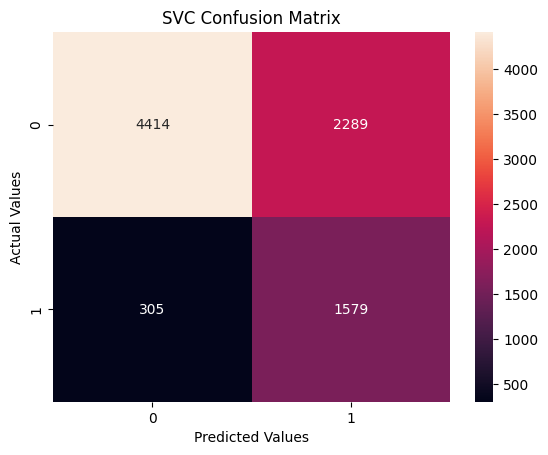

In [ ]:
# Build a confusion matrix to visualize the model's performance
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

svc_cm = confusion_matrix(validation_set['Bonus'], bonus_prediction_validation)
sns.heatmap(svc_cm, annot=True, fmt='g')
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

* The SVC model's performance is okay.
* Let's try other classification models.

In [ ]:
#### KNeighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(training_predictors_scaled, training_ds['Bonus'])
knn_pred = knn.predict(validation_predictors_scaled)

knn_acc = accuracy_score(knn_pred, validation_set['Bonus'])
knn_pre = precision_score(knn_pred, validation_set['Bonus'])
knn_rec = recall_score(knn_pred, validation_set['Bonus'])
knn_f1 = f1_score(knn_pred, validation_set['Bonus'])

print('KNN Model Accuracy: %.4f \n' % round(knn_acc, 4),
      'KNN Model Precision: %.4f \n' % round(knn_pre, 4),
      'KNN Model Recall: %.4f \n' % round(knn_rec, 4),
      'KNN Model F1 Score: %.4f \n' % round(knn_f1, 4))


KNN Model Accuracy: 0.6730 
 KNN Model Precision: 0.7473 
 KNN Model Recall: 0.3765 
 KNN Model F1 Score: 0.5007 



* The KNN classifier performs worse than the SVC on our dataset, as evidenced in its consistently lower accuracy, precision, recall, and F1 score.
* How about the decision tree classifiers?

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_jobs = 4)
rf_classifier.fit(training_predictors_scaled, training_ds['Bonus'])
rf_pred = rf_classifier.predict(validation_predictors_scaled)

rf_acc = accuracy_score(rf_pred, validation_set['Bonus'])
rf_pre = precision_score(rf_pred, validation_set['Bonus'])
rf_rec = recall_score(rf_pred, validation_set['Bonus'])
rf_f1 = f1_score(rf_pred, validation_set['Bonus'])

print('Random Forest Model Accuracy: %.4f \n' % round(rf_acc, 4),
      'Random Forest Model Precision: %.4f \n' % round(rf_pre, 4),
      'Random Forest Model Recall: %.4f \n' % round(rf_rec, 4),
      'Random Forest Model F1 Score: %.4f \n' % round(rf_f1, 4))

Random Forest Model Accuracy: 0.6864 
 Random Forest Model Precision: 0.7182 
 Random Forest Model Recall: 0.3849 
 Random Forest Model F1 Score: 0.5012 



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier(learning_rate = 0.1)
xgb.fit(training_predictors_scaled, training_ds['Bonus'])
xgb_pred = xgb.predict(validation_predictors_scaled)

xgb_acc = accuracy_score(xgb_pred, validation_set['Bonus'])
xgb_pre = precision_score(xgb_pred, validation_set['Bonus'])
xgb_rec = recall_score(xgb_pred, validation_set['Bonus'])
xgb_f1 = f1_score(xgb_pred, validation_set['Bonus'])

print('XGBoost Model Accuracy: %.4f \n' % round(xgb_acc, 4),
      'XGBoost Model Precision: %.4f \n' % round(xgb_pre, 4),
      'XGBoost Model Recall: %.4f \n' % round(xgb_rec, 4),
      'XGBoost Model F1 Score: %.4f \n' % round(xgb_f1, 4))

XGBoost Model Accuracy: 0.6907 
 XGBoost Model Precision: 0.8493 
 XGBoost Model Recall: 0.4028 
 XGBoost Model F1 Score: 0.5464 



* Now, let's compare the four models using their AUC curves.

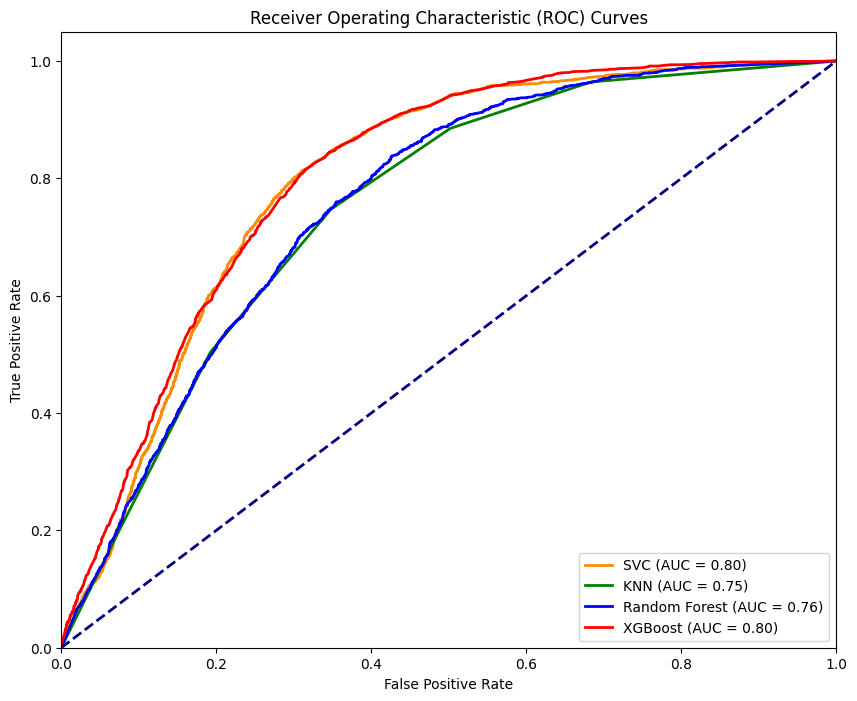

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the validation set for each model
svc_probs = clf.decision_function(validation_predictors_scaled)
knn_probs = knn.predict_proba(validation_predictors_scaled)[:, 1]
rf_probs = rf_classifier.predict_proba(validation_predictors_scaled)[:, 1]
xgb_probs = xgb.predict_proba(validation_predictors_scaled)[:, 1]

# Calculate ROC curves and AUC scores
svc_fpr, svc_tpr, _ = roc_curve(validation_set['Bonus'], svc_probs)
svc_roc_auc = auc(svc_fpr, svc_tpr)

knn_fpr, knn_tpr, _ = roc_curve(validation_set['Bonus'], knn_probs)
knn_roc_auc = auc(knn_fpr, knn_tpr)

rf_fpr, rf_tpr, _ = roc_curve(validation_set['Bonus'], rf_probs)
rf_roc_auc = auc(rf_fpr, rf_tpr)

xgb_fpr, xgb_tpr, _ = roc_curve(validation_set['Bonus'], xgb_probs)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(svc_fpr, svc_tpr, color='darkorange', lw=2, label='SVC (AUC = %0.2f)' % svc_roc_auc)
plt.plot(knn_fpr, knn_tpr, color='green', lw=2, label='KNN (AUC = %0.2f)' % knn_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
plt.plot(xgb_fpr, xgb_tpr, color='red', lw=2, label='XGBoost (AUC = %0.2f)' % xgb_roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


#### 10. Fine-tuning


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [2, 5, 10],     # Maximum depth of the trees
    'min_samples_split': [5, 10, 15], # Minimum number of samples required to split an internal node
}

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                          cv=5, scoring='f1', n_jobs=-1) # Use 5-fold cross-validation and F1 score

grid_search.fit(training_predictors_scaled, training_ds['Bonus'])

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

# Evaluate the best model on the validation set
best_rf_predictions = best_rf_model.predict(validation_predictors_scaled)

best_rf_acc = accuracy_score(best_rf_predictions, validation_set['Bonus'])
best_rf_pre = precision_score(best_rf_predictions, validation_set['Bonus'])
best_rf_rec = recall_score(best_rf_predictions, validation_set['Bonus'])
best_rf_f1 = f1_score(best_rf_predictions, validation_set['Bonus'])

print('Fine-tuned Random Forest Model Accuracy: %.4f \n' % round(best_rf_acc, 4),
      'Fine-tuned Random Forest Model Precision: %.4f \n' % round(best_rf_pre, 4),
      'Fine-tuned Random Forest Model Recall: %.4f \n' % round(best_rf_rec, 4),
      'Fine-tuned Random Forest Model F1 Score: %.4f \n' % round(best_rf_f1, 4))

Best Hyperparameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Fine-tuned Random Forest Model Accuracy: 0.6857 
 Fine-tuned Random Forest Model Precision: 0.8599 
 Fine-tuned Random Forest Model Recall: 0.3995 
 Fine-tuned Random Forest Model F1 Score: 0.5455 



* Now, let's compare the performance of the fine-tuned model and the original random forest classifier on the test set.

In [ ]:
# Evaluate the original Random Forest model on the test set
rf_classifier = RandomForestClassifier(random_state=42, n_jobs = 4)
rf_classifier.fit(training_predictors_scaled, training_ds['Bonus'])
rf_test_predictions = rf_classifier.predict(test_predictors_scaled)

rf_test_acc = accuracy_score(rf_test_predictions, test_set['Bonus'])
rf_test_pre = precision_score(rf_test_predictions, test_set['Bonus'])
rf_test_rec = recall_score(rf_test_predictions, test_set['Bonus'])
rf_test_f1 = f1_score(rf_test_predictions, test_set['Bonus'])

print('Original Random Forest Model (Test Set):')
print('Accuracy: %.4f' % rf_test_acc)
print('Precision: %.4f' % rf_test_pre)
print('Recall: %.4f' % rf_test_rec)
print('F1 Score: %.4f' % rf_test_f1)


# Evaluate the fine-tuned Random Forest (best_rf) model on the test set
best_rf_test_predictions = best_rf_model.predict(test_predictors_scaled)

best_rf_test_acc = accuracy_score(best_rf_test_predictions, test_set['Bonus'])
best_rf_test_pre = precision_score(best_rf_test_predictions, test_set['Bonus'])
best_rf_test_rec = recall_score(best_rf_test_predictions, test_set['Bonus'])
best_rf_test_f1 = f1_score(best_rf_test_predictions, test_set['Bonus'])

print('\nFine-tuned Random Forest Model (Test Set):')
print('Accuracy: %.4f' % best_rf_test_acc)
print('Precision: %.4f' % best_rf_test_pre)
print('Recall: %.4f' % best_rf_test_rec)
print('F1 Score: %.4f' % best_rf_test_f1)

Original Random Forest Model (Test Set):
Accuracy: 0.6784
Precision: 0.7215
Recall: 0.3792
F1 Score: 0.4971

Fine-tuned Random Forest Model (Test Set):
Accuracy: 0.6718
Precision: 0.8467
Recall: 0.3879
F1 Score: 0.5320


In [ ]:
# Compare the two models' performance using the confusion matrix
rf_cm = confusion_matrix(test_set['Bonus'], rf_test_predictions)
best_rf_cm = confusion_matrix(test_set['Bonus'], best_rf_test_predictions)

print('Original Random Forest Model Confusion Matrix:')
print(rf_cm)

print('\nFine-tuned Random Forest Model Confusion Matrix:')
print(best_rf_cm)

Original Random Forest Model Confusion Matrix:
[[4460 2235]
 [ 527 1365]]

Fine-tuned Random Forest Model Confusion Matrix:
[[4167 2528]
 [ 290 1602]]


* Is the fine-tuning effective?
* Why does the `best_rf` model has a lower accuracy but a higher F1 score?

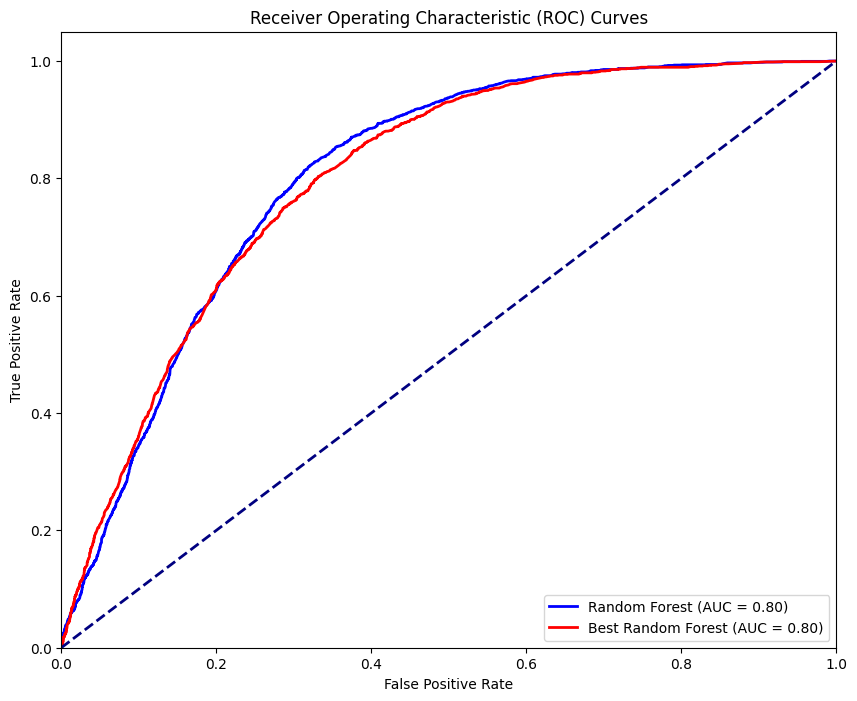

In [ ]:
# Compare their performance using the AUC curve.
# Predict probabilities for the validation set for each model
best_rf_probs = best_rf_model.predict_proba(test_predictors_scaled)[:, 1]

# Calculate ROC curves and AUC scores
best_rf_fpr, best_rf_tpr, _ = roc_curve(test_set['Bonus'], best_rf_probs)
best_rf_roc_auc = auc(xgb_fpr, xgb_tpr)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % rf_roc_auc)
plt.plot(best_rf_fpr, best_rf_tpr, color='red', lw=2, label='Best Random Forest (AUC = %0.2f)' % best_rf_roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()